In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [105]:
data=pd.read_csv("heart_2020_cleaned.csv")
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [72]:
data.shape

(319795, 18)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [74]:
data.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [75]:
AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: AgeCategory[x])
data['AgeCategory'] = data['AgeCategory'].astype('float')

In [76]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,54.355759,7.097075
std,6.356100,7.95085,7.955235,17.720429,1.436007
min,12.020000,0.00000,0.000000,21.000000,1.000000
25%,24.030000,0.00000,0.000000,42.000000,6.000000
50%,27.340000,0.00000,0.000000,57.000000,7.000000
75%,31.420000,2.00000,3.000000,67.000000,8.000000
max,94.850000,30.00000,30.000000,80.000000,24.000000


In [77]:
#Checking the percentage of missing values
data.isna().sum()/data.shape[0]*100

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

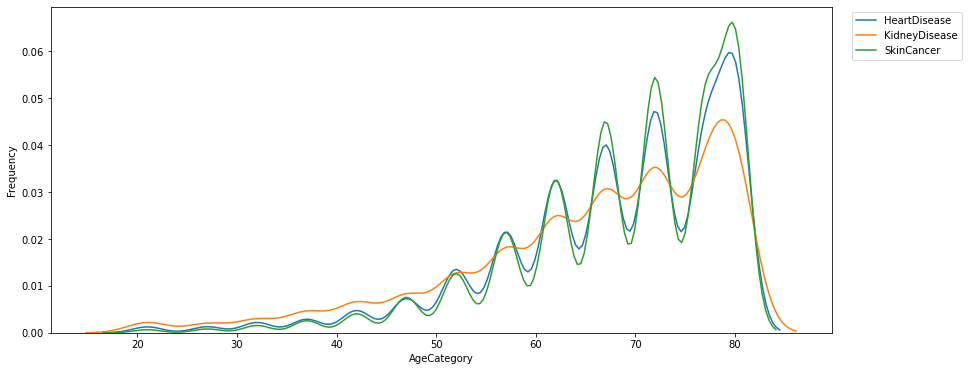

In [78]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(data[data["HeartDisease"]=='Yes']["AgeCategory"], label="HeartDisease", ax = ax)
sns.kdeplot(data[data["KidneyDisease"]=='Yes']["AgeCategory"], label="KidneyDisease", ax = ax)
sns.kdeplot(data[data["SkinCancer"]=='Yes']["AgeCategory"], label="SkinCancer", ax = ax)

ax.set_xlabel("AgeCategory")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2)
plt.show()

People having heart disease, skin cancer & kidney disease are mostly old people

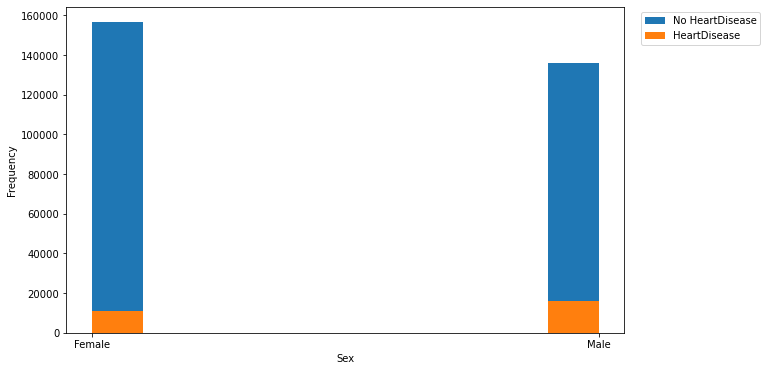

In [79]:
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(data[data["HeartDisease"]=='No']["Sex"], label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Sex"], label="HeartDisease")

ax.set_xlabel("Sex")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2)

In [80]:
female_with_heart_disease = data[(data['HeartDisease']=='Yes') & (data['Sex']=='Female')]
num_female = data[data['Sex']=='Female']
male_with_heart_disease = data[(data['HeartDisease']=='Yes') & (data['Sex']=='Male')]
num_male = data[data['Sex']=='Male']
print('Percentage of male having Heart disease:', len(male_with_heart_disease)/len(num_male))
print('Percentage of female having Heart disease:', len(female_with_heart_disease)/len(num_female))

Percentage of male having Heart disease: 0.10618461740904007
Percentage of female having Heart disease: 0.06694675367241738


Most heart disease patients are Male than Females and more Females were tested than males

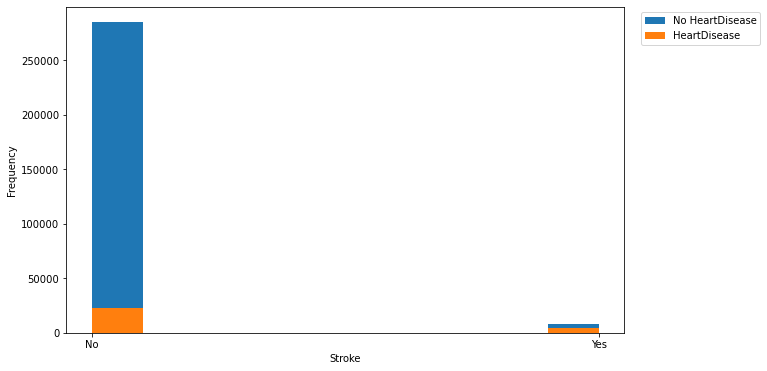

In [81]:
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(data[data["HeartDisease"]=='No']["Stroke"], label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Stroke"], label="HeartDisease")

ax.set_xlabel("Stroke")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2)

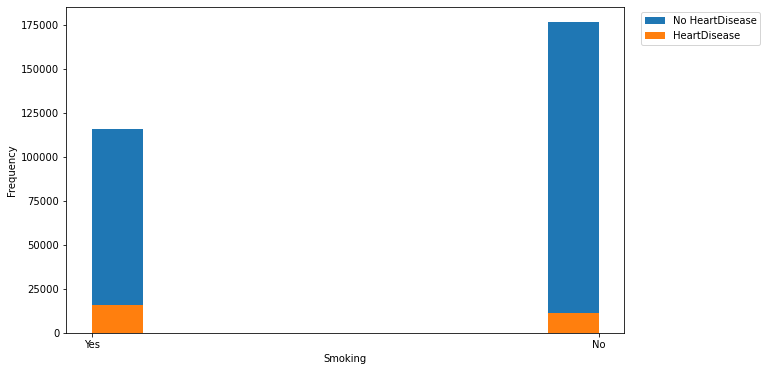

In [82]:
fig, ax = plt.subplots(figsize = (10,6))
ax.hist(data[data["HeartDisease"]=='No']["Smoking"], label="No HeartDisease")
ax.hist(data[data["HeartDisease"]=='Yes']["Smoking"], label="HeartDisease")

ax.set_xlabel("Smoking")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2)
plt.show()

In [83]:
smoke = len(data[(data['HeartDisease']=='Yes') & (data['Smoking']=='Yes')])
num_smoke = len(data[data['Smoking']=='Yes'])
no_smoke = len(data[(data['HeartDisease']=='Yes') & (data['Smoking']=='No')])
num_no_smoke = len(data[data['Smoking']=='No'])
print('Probability of Heart disease if you smoke:', smoke/num_smoke)
print("Probability of Heart disease if you don't smoke:", no_smoke/num_no_smoke)

Probability of Heart disease if you smoke: 0.12157715983867544
Probability of Heart disease if you don't smoke: 0.0603341370078824


Most heart disease patients smoke

In [84]:
data.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [85]:
data.Diabetic.value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [106]:
data= data[data.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
data['Diabetic'] = data['Diabetic'].astype(int)

<AxesSubplot:>

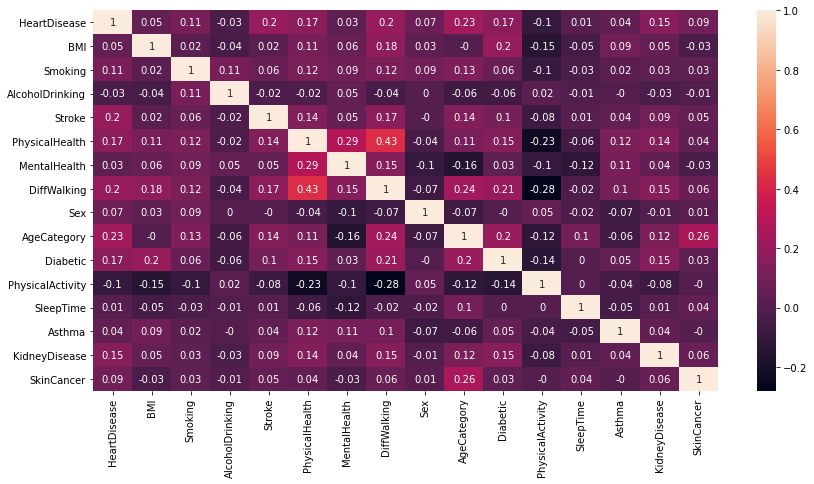

In [87]:
correlation = data.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True)

    LOGISTIC REGRESSION MODEL

In [107]:
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,0,0,Good,12.0,0,0,0


In [108]:
Race_new=pd.get_dummies(data["Race"],drop_first=True)
Race_new.head(5)

,Asian,Black,Hispanic,Other,White
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [109]:
GenHealth_new=pd.get_dummies(data["GenHealth"],drop_first=True)
GenHealth_new.head(5)

,Fair,Good,Poor,Very good
0,0,0,0,1
1,0,0,0,1
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1


In [110]:
data=pd.concat([data,Race_new,GenHealth_new],axis=1)
data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,SkinCancer,Asian,Black,Hispanic,Other,White,Fair,Good,Poor,Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,...,1,0,0,0,0,1,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,...,0,0,0,0,0,1,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,...,0,0,0,0,0,1,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,...,1,0,0,0,0,1,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,...,0,0,0,0,0,1,0,0,0,1


In [111]:
data.drop(["Race","GenHealth","AgeCategory"],axis=1,inplace=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,SkinCancer,Asian,Black,Hispanic,Other,White,Fair,Good,Poor,Very good
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,1,0,0,0,0,1,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0,0,0,0,0,1,1,0,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


TRAIN DATA

In [112]:
X=data.drop("HeartDisease",axis=1)
y=data["HeartDisease"]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [117]:
logmodel=LogisticRegression()

In [118]:
logmodel.fit(X_train, y_train)

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [121]:
prediction=logmodel.predict(X_test)

In [123]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.92      0.99      0.96     58574\n           1       0.55      0.10      0.16      5385\n\n    accuracy                           0.92     63959\n   macro avg       0.74      0.54      0.56     63959\nweighted avg       0.89      0.92      0.89     63959\n'

In [125]:
confusion_matrix(y_test,prediction)

array([[58150,   424],
       [ 4872,   513]], dtype=int64)

In [128]:
accuracy_score(y_test,prediction)

0.9171969542988477

MODEL EVALUATION

a. Confusion matrix

The confusion matrix is a matrix used to determine the performance of the classification models for a given set of test data.


The table has the following cases:

True Negative: Model has given prediction No, and the real or actual value was also No.

True Positive: The model has predicted yes, and the actual value was also true.

False Negative: The model has predicted no, but the actual value was Yes, it is also called as Type-II error.

False Positive: The model has predicted Yes, but the actual value was No. It is also called a Type-I error.

In [130]:
cm=confusion_matrix(y_test,prediction)
cm

array([[58150,   424],
       [ 4872,   513]], dtype=int64)

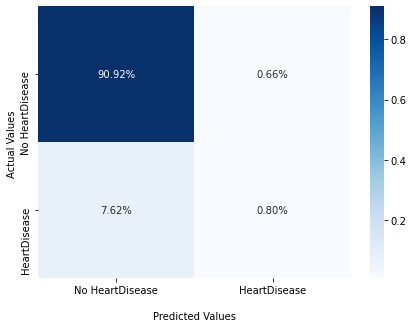

In [133]:
plt.figure(figsize=(7,5))
ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Blues')

ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

plt.show()

PRECISION

Precision is defined as the ratio of correctly classified positive samples (True Positive) to a total number of classified positive samples (either correctly or incorrectly).

Precision = True Positive/True Positive + False Positive  

The precision of a machine learning model will be low when the value of;

TP+FP (denominator) > TP (Numerator)  

The precision of the machine learning model will be high when Value of;

TP (Numerator) > TP+FP (denominator)  

Hence, precision helps us to visualize the reliability of the machine learning model in classifying the model as positive.

In [137]:
prec = metrics.precision_score(y_test, prediction)
prec

0.5474919957310566

RECALL

The recall is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect positive samples. The higher the recall, the more positive samples detected.

Recall = True Positive/True Positive + False Negative  

Recall of a machine learning model will be low when the value of;
TP+FN (denominator) > TP (Numerator)

Recall of machine learning model will be high when Value of;
TP (Numerator) > TP+FN (denominator)

Unlike Precision, Recall is independent of the number of negative sample classifications. Further, if the model classifies all positive samples as positive, then Recall will be 1.

In [138]:
rec = metrics.recall_score(y_test, prediction)
rec

0.09526462395543175

F1 SCORE

F1 Score considers both precision and recall. It is the harmonic mean(average) of the precision and recall.

F1 Score is best if there is some sort of balance between precision (p) & recall (r) in the system. Oppositely F1 Score isn’t so high if one measure is improved at the expense of the other.

For example, if P is 1 & R is 0, F1 score is 0.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [139]:
f1 = metrics.f1_score(y_test,prediction)
print (f1)

0.16229041442581463


SENSITIVITY

Sensitivity is a measure of how well a machine learning model can detect positive instances. It is also known as the true positive rate (TPR) or recall. Sensitivity is used to evaluate model performance because it allows us to see how many positive instances the model was able to correctly identify.

Sensitivity = (True Positive)/(True Positive + False Negative)

A high sensitivity means that the model is correctly identifying most of the positive results, while a low sensitivity means that the model is missing a lot of positive results.

In [140]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

Sensitivity :  0.9927612934066309


SPECIFICITY

Specificity measures the proportion of true negatives that are correctly identified by the model. This implies that there will be another proportion of actual negative which got predicted as positive and could be termed as false positives. This proportion could also be called a True Negative Rate (TNR). The sum of specificity (true negative rate) and false positive rate would always be 1. 

Specificity = (True Negative)/(True Negative + False Positive)

High specificity means that the model is correctly identifying most of the negative results, while a low specificity means that the model is mislabeling a lot of negative results as positive.

In [141]:
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Specificity :  0.09526462395543175


MISCLASSIFICATION RATE

In machine learning, misclassification rate is a metric that tells us the percentage of observations that were incorrectly predicted by some classification model.

Misclassification Rate = (false positive + false negative) / (total predictions)

The value for misclassification rate can range from 0 to 1 where:

0 represents a model that had zero incorrect predictions.
1 represents a model that had completely incorrect predictions.

The lower the value for the misclassification rate, the better a classification model is able to predict the outcomes of the response variable.

In [142]:
MR = 1-metrics.accuracy_score(y_test,prediction)
print ("Misclassification rate: ", MR)

Misclassification rate:  0.08280304570115227


ROC CURVE

The ROC curve summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the False Positive Rate (FPR) on the X-axis and the True Positive Rate (TPR) on the Y-axis.

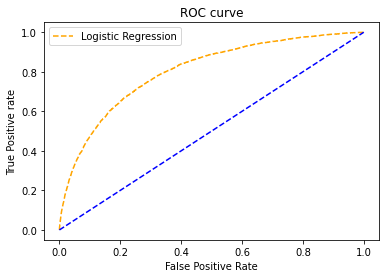

In [147]:
# roc curve for model
fpr,tpr, threshold = roc_curve(y_test,logmodel.predict_proba(X_test)[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show()

AUROC 

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

In [148]:
auc_score = roc_auc_score(y_test, logmodel.predict_proba(X_test)[:,1])

print("Area under curve is: ", auc_score)

Area under curve is:  0.8033660267821745
